## Week 6 Jupyter Notebook — Decision Trees and Random Forests 
Each week, you will apply the concepts of that week to your Integrated Capstone Project’s dataset. In preparation for Milestone One, create a Jupyter Notebook (similar to in Module B, Semester Two) that illustrates these lessons. There are no specific questions to answer in your Jupyter Notebook files in this course; your general goal is to analyze your data using the methods you have learned about in this course and in this program and draw interesting conclusions. 

For Week 6, include concepts such as decision trees and random forests. Complete your Jupyter Notebook homework by 11:59pm ET on Sunday. 

In Week 7, you will compile your findings from your Jupyter Notebook homework into your Milestone One assignment for grading. For full instructions and the rubric for Milestone One, refer to the following link. 



Dataset can be found here: https://www.kaggle.com/datasets/wordsforthewise/lending-club

I also leveraged the author's EDA approach, which can be found here: EDA with Python -  https://www.kaggle.com/code/wordsforthewise/eda-with-python


<b>Note regarding dataset</b>: The Lending club data set is HUGE, at 2 million+ rows. It took a long time to download and will taken even longer to train models on. I tried to trim it to 50,000 rows, but it there were 151 columns and a lot of missing data, which you can see screen shots here: EDA with Python -  https://www.kaggle.com/code/wordsforthewise/eda-with-python

Due to these issues, I changed to a smaller version of the LendingClub dataset: https://www.kaggle.com/datasets/abhishek14398/loan-dataset. (loan.csv file)


<b>Resources / References </b>:

I leveraged YellowDig and Google to find supporting documentation. 

- For sklearn.tree import DecisionTreeClassifier: 
    - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 
    - https://www.geeksforgeeks.org/machine-learning/building-and-implementing-decision-tree-classifiers-with-scikit-learn-a-comprehensive-guide/

- Decision Trees, random forests: 
    - https://www.kdnuggets.com/2022/08/decision-trees-random-forests-explained.html
    - https://www.youtube.com/watch?v=YUsx5ZNlYWc


In [287]:
#libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [288]:
#load file
file_path = "loan.csv"
df_loan = pd.read_csv(file_path)

#basic info/review
df_loan.shape, df_loan.head(15)


/var/folders/2q/3t5h8lp97hz63t941xlydf4w0000gn/T/ipykernel_69653/247419880.py:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loan = pd.read_csv(file_path)


((39717, 111),
          id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
 0   1077501    1296599       5000         5000           4975.0   36 months   
 1   1077430    1314167       2500         2500           2500.0   60 months   
 2   1077175    1313524       2400         2400           2400.0   36 months   
 3   1076863    1277178      10000        10000          10000.0   36 months   
 4   1075358    1311748       3000         3000           3000.0   60 months   
 5   1075269    1311441       5000         5000           5000.0   36 months   
 6   1069639    1304742       7000         7000           7000.0   60 months   
 7   1072053    1288686       3000         3000           3000.0   36 months   
 8   1071795    1306957       5600         5600           5600.0   60 months   
 9   1071570    1306721       5375         5375           5350.0   60 months   
 10  1070078    1305201       6500         6500           6500.0   60 months   
 11  1069908    1305008  

In [289]:
#basic reviews
print("\nmissing values:\n", df.isnull().sum())



missing values:
 id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
loan_default                      0
Length: 112, dtype: int64


In [290]:
#print columns
# needed to understand what the target variable should be (appears to be: loan_status)
print(df.columns.tolist())

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

In [291]:
#confirm details of loan status column
print(df['loan_status'].value_counts(dropna=False))


loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64


In [292]:
#filter to focus on fully paid / charged off 
# we do not want current loans included because they are currently being paid back, so we don tknow if they are going to detault or be paid in full (PIF)
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

#set up inary target column: 1 = defaulted (Charged Off), 0 = repaid (Fully Paid)
df['loan_default'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

#confirm
print(df['loan_default'].value_counts())



loan_default
0    32950
1     5627
Name: count, dtype: int64


Note: loan_status was updated into loan_default to provide a binary classification outcome: Fully Paid = 0 (non-default), Charged Off = 1 (default).


In [293]:
#receuved warning SettingWithCopyWarning... so I will create a copy when filtering 
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])].copy()

#add the column
df['loan_default'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})


In [294]:
## CLEAN DATA

#calc missing value %
missing_percent = df.isnull().mean().sort_values(ascending=False)

#show top 20 columns -highest missing data
print("top missing columns:\n")
print(missing_percent.head(20))

#add threshold; will drop columns with ≥ 50% missing)
threshold = 0.5
cols_to_drop = missing_percent[missing_percent >= threshold].index

print(f"\n # of columns to drop: {len(cols_to_drop)}")
print(cols_to_drop.tolist())

#drop those columns
df_clean = df.drop(columns=cols_to_drop)


top missing columns:

mort_acc                       1.0
mths_since_recent_bc_dlq       1.0
total_rev_hi_lim               1.0
mo_sin_rcnt_tl                 1.0
mo_sin_rcnt_rev_tl_op          1.0
mo_sin_old_rev_tl_op           1.0
mo_sin_old_il_acct             1.0
bc_util                        1.0
bc_open_to_buy                 1.0
avg_cur_bal                    1.0
acc_open_past_24mths           1.0
next_pymnt_d                   1.0
mths_since_last_major_derog    1.0
inq_last_12m                   1.0
total_cu_tl                    1.0
annual_inc_joint               1.0
dti_joint                      1.0
verification_status_joint      1.0
inq_fi                         1.0
tot_coll_amt                   1.0
dtype: float64

 # of columns to drop: 57
['mort_acc', 'mths_since_recent_bc_dlq', 'total_rev_hi_lim', 'mo_sin_rcnt_tl', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_old_rev_tl_op', 'mo_sin_old_il_acct', 'bc_util', 'bc_open_to_buy', 'avg_cur_bal', 'acc_open_past_24mths', 'next_pymnt_d', 'm

After removing current loans and dropping features with >50% missing data, I was left with 54 columns. The final dataset had 38,577 observations (32,950 fully paid, 5,627 charged off). The most correlated pre-loan numeric features with default were revol_util, inq_last_6mths, and loan_amnt, although correlations were generally weak.

Updated dataframe (DF)shows:
- Rows: 38,577 (32950 + 5627)
- Columns: 54 (after dropping 57 from the original 111)
- Target column: loan_default:
    - 0 = Fully Paid (majority)
    - 1 = Charged Off (minority)


In [295]:
#eval if i should remove any other columns 
missing_summary = df_clean.isnull().sum()
print(missing_summary[missing_summary > 0])

emp_title                      2386
emp_length                     1033
desc                          12529
title                            11
revol_util                       50
last_pymnt_d                     71
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64


In [296]:
#continue to clean data
#remove columns with high missing values -- emp_title and desc
df_clean = df_clean.drop(['emp_title', 'desc'], axis=1)

#fill missing values
df_clean['emp_length'] = df_clean['emp_length'].fillna('Unknown')
df_clean['title'] = df_clean['title'].fillna(df_clean['title'].mode()[0])

#convert revol_util and fill missing
df_clean['revol_util'] = df_clean['revol_util'].str.rstrip('%').astype(float)
df_clean['revol_util'] = df_clean['revol_util'].fillna(df_clean['revol_util'].median())

#fill dates
df_clean['last_pymnt_d'] = df_clean['last_pymnt_d'].fillna('Unknown')
df_clean['last_credit_pull_d'] = df_clean['last_credit_pull_d'].fillna(df_clean['last_credit_pull_d'].mode()[0])

#fill sparse fields with 0
for col in ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']:
    df_clean[col] = df_clean[col].fillna(0)

#fill with median
df_clean['pub_rec_bankruptcies'] = df_clean['pub_rec_bankruptcies'].fillna(df_clean['pub_rec_bankruptcies'].median())



In [297]:
#Check output
#shape
print("Shape (rows, columns):", df_clean.shape)

#columns with missing values
print("\nmssing values per column (i.e. non-zero only):")
missing = df_clean.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))

#print data types, non-null counts
print("\nDataFrame info:")
print(df_clean.info())


Shape (rows, columns): (38577, 53)

mssing values per column (i.e. non-zero only):
Series([], dtype: int64)

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_length                  38577 non-null  object 
 11  home_ownership           

In [298]:
#print date
print(df_clean['issue_d'].head(10)) 

0     Dec-11
1     Dec-11
2     Dec-11
3     Dec-11
5     Dec-11
6     Dec-11
7     Dec-11
8     Dec-11
9     Dec-11
10    Dec-11
Name: issue_d, dtype: object


In [299]:
## continue to clean up data and convert dates  
#list of date-related columns in string format
#struggled with this due to me removing some of the columns earlier in the process, had to revise the query a few times
# Convert date columns to datetime
date_cols = [
    'issue_d',
    'last_pymnt_d',
    'last_credit_pull_d',
    'earliest_cr_line'
]

#convert to datetime using correct format
for col in date_cols:
    df_clean[col] = pd.to_datetime(df_clean[col], format='%b-%y', errors='coerce')

#pull features from issue_d
df_clean['issue_year'] = df_clean['issue_d'].dt.year
df_clean['issue_month'] = df_clean['issue_d'].dt.month

#pull year of earliest credit line
df_clean['earliest_cr_year'] = df_clean['earliest_cr_line'].dt.year

#calc bwrs credit history length in YEARS at time of loan
df_clean['credit_hist_length'] = df_clean['issue_d'].dt.year - df_clean['earliest_cr_line'].dt.year

#preview
print(df_clean[['issue_d', 'issue_year', 'issue_month', 'earliest_cr_line', 'earliest_cr_year', 'credit_hist_length']].head(10))




      issue_d  issue_year  issue_month earliest_cr_line  earliest_cr_year  \
0  2011-12-01        2011           12       1985-01-01              1985   
1  2011-12-01        2011           12       1999-04-01              1999   
2  2011-12-01        2011           12       2001-11-01              2001   
3  2011-12-01        2011           12       1996-02-01              1996   
5  2011-12-01        2011           12       2004-11-01              2004   
6  2011-12-01        2011           12       2005-07-01              2005   
7  2011-12-01        2011           12       2007-01-01              2007   
8  2011-12-01        2011           12       2004-04-01              2004   
9  2011-12-01        2011           12       2004-09-01              2004   
10 2011-12-01        2011           12       1998-01-01              1998   

    credit_hist_length  
0                   26  
1                   12  
2                   10  
3                   15  
5                    7  
6 

In [300]:
#check values after cleaning up the data
#basic shape and value counts
print("Shape:", df_clean.shape)
print("\nLoan dfault count")
print(df_clean['loan_default'].value_counts())

# Summary statistics for numeric and object columns
print("\n # Features Summary ---")
print(df_clean.describe())

print("\n categorical features smmary ---")
print(df_clean.describe(include='object'))

#review correlations ; for numeric variables only
correlation = df_clean.corr(numeric_only=True)
print("\nTop Correlated Features with loan_default:")
print(correlation['loan_default'].sort_values(ascending=False))


Shape: (38577, 57)

Loan dfault count
loan_default
0    32950
1     5627
Name: count, dtype: int64

 # Features Summary ---
                 id     member_id     loan_amnt   funded_amnt  \
count  3.857700e+04  3.857700e+04  38577.000000  38577.000000   
mean   6.763787e+05  8.422843e+05  11047.025430  10784.058506   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.120330e+05  6.611310e+05   5300.000000   5200.000000   
50%    6.564230e+05  8.392920e+05   9600.000000   9550.000000   
75%    8.291460e+05  1.037336e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   
std    2.092639e+05  2.644519e+05   7348.441646   7090.306027   

       funded_amnt_inv   installment    annual_inc  \
count     38577.000000  38577.000000  3.857700e+04   
mean      10222.481123    322.466318  6.877797e+04   
min           0.000000     15.690000  4.000000e+03   
25%        5000.000000    165.740000  4.000000e+04   
50%        8733.4400

In [301]:
#eval correlation
correlation = df_clean.corr(numeric_only=True)
correlation['loan_default'].sort_values(key=abs, ascending=False).head(15)


loan_default               1.000000
recoveries                 0.339562
total_rec_prncp           -0.334944
total_pymnt               -0.235898
total_pymnt_inv           -0.232906
last_pymnt_amnt           -0.222524
collection_recovery_fee    0.204914
total_rec_late_fee         0.165115
revol_util                 0.099870
inq_last_6mths             0.071878
loan_amnt                  0.059463
funded_amnt                0.056497
pub_rec                    0.051001
pub_rec_bankruptcies       0.046989
dti                        0.045078
Name: loan_default, dtype: float64

In [302]:
#select numeric features; based on correlation output
#I am only selecting PRE-loan features… the post-0outcome variables are not included because they show what happens AFTER the borrower details. 
#if I include the post-default variables, that will show incorrect/reverse causality
features = [
    'loan_amnt',
    'funded_amnt',
    'term',
    'installment',
    'grade',
    'sub_grade',
    'emp_length',
    'home_ownership',
    'annual_inc',
    'verification_status',
    'purpose',
    'dti',
    'open_acc',
    'pub_rec',
    'revol_bal',
    'revol_util',
    'inq_last_6mths',
    'delinq_2yrs',
    'earliest_cr_year',
    'credit_hist_length'
]

X = df_clean[features]
y = df_clean['loan_default']

#remove non number columns
X = X.select_dtypes(include='number')
X = X.fillna(X.median())


#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Decision tree classifier eval:
accuracy: 0.749438396405737

confusion matrix:
[[8311 1575]
 [1325  363]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      9886
           1       0.19      0.22      0.20      1688

    accuracy                           0.75     11574
   macro avg       0.52      0.53      0.53     11574
weighted avg       0.76      0.75      0.76     11574



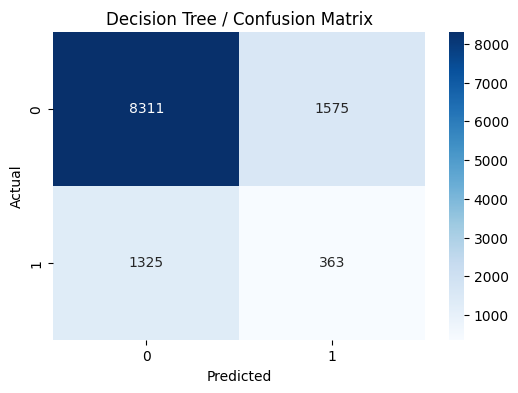

In [303]:
### TRAIN AND EVAL - DECISION TREE CLASASIFIER 

#setup model
dt_model = DecisionTreeClassifier(random_state=42)

#fit the model on training data
dt_model.fit(X_train_scaled, y_train)

#predict on test data
y_pred_dt = dt_model.predict(X_test_scaled)

#eval performance
print("Decision tree classifier eval:")
print("accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nconfusion matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

#Graph-confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree / Confusion Matrix")
plt.show()


### Decision Tree Classifier Observations 


After cleaning the dataset, I trained the Decision Tree Classifier. I only used pre-loan features, since including what occurs after default would result in noise. 

Based on the Decision Tree Classifier’s performance on the test data, the model generated accuracy of approximately 74.9% (i.e., it correctly classified almost three-quarters of the loan outcomes). That said, accuracy alone is not sufficient given the class imbalance between fully paid loans and defaults.

### Confusion Matrix

|               | Predicted: Fully Paid (0) | Predicted: Default (1) |
|---------------|---------------------------|-------------------------|
| **Actual: Fully Paid (0)** | 8311                      | 1575                    |
| **Actual: Default (1)**     | 1325                      | 363                     |

- True Negatives (TN): 8311  
- False Positives (FP): 1575  
- False Negatives (FN): 1325  
- True Positives (TP): 363

### Classification Report (Class 1 – Default)

- Precision: 0.19  
- Recall: 0.22  
- F1 Score: 0.20  
- Support: 1688

While the overall accuracy seems strong, the classifier struggles significantly with identifying defaulted loans (class 1). It only identified 22% of actual defaults, with a precision of just19% (i.e., most of the loans it predicted as defaults were incorrect). The F1 score of 0.20 confirms weak performance in this minority class.

### Interpretation

This result highlights a common challenge in imbalanced classification problems; the model tends to favor the majority class (fully paid loans) and performs poorly in detecting the minority class (defaults), which is often the more important class in risk modeling (especially in credit modeling and risk management). Due to this, I will try to adjust the class weights (class_weight=balanced`) --- see the code block below. 




Deision tree classifier BALANCED eval:
Accuracy: 0.7612752721617418

Confusion matrix:
[[8470 1416]
 [1347  341]]

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      9886
           1       0.19      0.20      0.20      1688

    accuracy                           0.76     11574
   macro avg       0.53      0.53      0.53     11574
weighted avg       0.77      0.76      0.76     11574



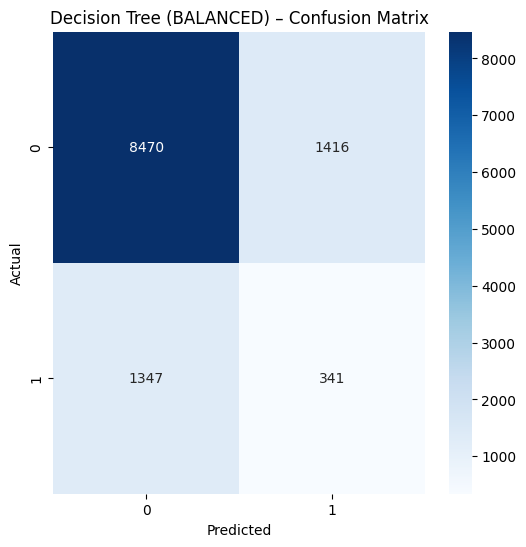

In [304]:
###  TRAIN AND EVAL – DECISION TREE CLASSIFIER (Balanced)


#setup model with class_weight='balanced'; needed due to class imbalance
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

#fit model
dt_model.fit(X_train_scaled, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test_scaled)

#evale
print("Deision tree classifier BALANCED eval:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification report:")
print(classification_report(y_test, y_pred_dt))

#plot confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree (BALANCED) – Confusion Matrix")
plt.show()


### Decision Tree Classifier Observations - BALANCED

A balacne aproach was used due to the imbalance in the dataset. This was needed because the defaults (class 1) represent a much smaller portion than fully paid loans (class 0); this is typical with financial datasets because most people do not default. I trained a Decision Tree model with the parameter class_weight='balanced' so the model would give a higher importance to the minority class (defaults).

### Performance Metrics

- Accuracy: 0.7613  
- Confusion Matrix:
    - True Negatives (TN): 8470  
    - False Positives (FP): 1416  
    - False Negatives (FN): 1347  
    - True Positives (TP): 341  
- Precision (Default Class): 0.19  
- Recall (Default Class): 0.20  
- F1-Score (Default Class): 0.20  
- Macro Avg F1: 0.53  
- Weighted Avg F1: 0.76

### Interpretation

Compared to the unweighted model, using class weighting improved the model's ability to detect defaults (class 1). While recall and precision remain relatively low, there was an increase in correctly predicted defaults (341 vs. 363), and a slight improvement in recall (20% vs. 22%). The tradeoff was a small decrease in accuracy due to more false positives, but this is acceptable since detecting defaults is a priority.


Random forest classifier-Balanced-eval:
Accuracy: 0.8545014688094004

Confusion matrix:
[[9882    4]
 [1680    8]]

Classification report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      9886
           1       0.67      0.00      0.01      1688

    accuracy                           0.85     11574
   macro avg       0.76      0.50      0.47     11574
weighted avg       0.83      0.85      0.79     11574



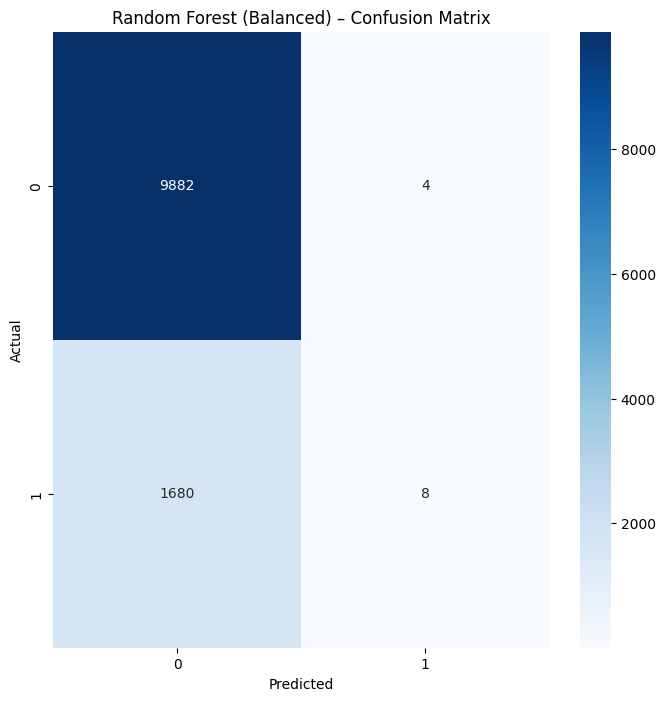

In [305]:
### TRAIN AND EVALUATE — RANDOM FOREST CLASSIFIER


#setup the model (w/balanced class weights), # trees = 100, no max depth to trees
rf_model = RandomForestClassifier(
    n_estimators=100,           
    max_depth=None,             
    class_weight='balanced',    
    random_state=42,
    n_jobs=-1                   
)

#fit the model on training data
rf_model.fit(X_train_scaled, y_train)

#predict on test set
y_pred_rf = rf_model.predict(X_test_scaled)

#eval performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Random forest classifier-Balanced-eval:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification report:")
print(classification_report(y_test, y_pred_rf))

#plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest (Balanced) – Confusion Matrix')
plt.show()


### Random Forest Classifier - Balanced / Review / Observations 

I used the Random Forest Classifier to improve performance over the Decision Tree. Random forests reduce overfitting by combining multiple trees and aggregating their predictions.
I also used the class_weight='balanced' to address the heavy class imbalance in the dataset (approx. 85% Fully Paid vs. 15% Default). 
Performance Summary for Random Forest Classifier: 
- Accuracy: 0.8545
- Confusion Matrix:
    - Predicted 0 (Fully Paid): 9882 true negatives, 1680 false negatives
    - Predicted 1 (Default): 4 false positives, 8 true positives
- Recall for Defaulted Loans: 0.00
- F1-Score for Defaulted Loans: 0.01

The model achieved a higher overall accuracy at 85.45%, but this pecentage is misleading due to the class imbalance. The model failed to correctly identify defaulted loans - 
- Only 8 out of 1688 defaults were correct predicted.
- This results in very low recall (0.00) and F1-score (0.01) for the default class

## Conclusion / Analysis 


### Decision Tree vs. Random Forest – Classifier Comparison (Balanced)

#### Objective
My goal in Week 6 was to apply classification models to predict loan default using borrower and loan application features. I leveraged two models, both with  class_weight='balanced’:
1. Decision Tree Classifier 
2. Random Forest Classifier
Both models were evaluated using the test set, and results were compared for accuracy, precision, recall, F1-score, and the confusion matrix. See chart below for the comparison: 


| Eval                       | Decision Tree (Balanced) | Random Forest (Balanced) |
|----------------------------|---------------------------|----------------------------|
| Accuracy                   | 0.7613                    | 0.8545                     |
| Precision (Default = 1)    | 0.19                      | 0.67                       |
| Recall (Default = 1)       | 0.20                      | 0.00                       |
| F1-Score (Default = 1)     | 0.20                      | 0.01                       |
| True Positives (Default)   | 341                       | 8                          |
| False Negatives (Default)  | 1347                      | 1680                       |
| True Negatives             | 8470                      | 9882                       |
| False Positives            | 1416                      | 4                          |

Observations: 
- Decision Tree detects more defaults (higher recall), despite lower accuracy. It was able to identify around 20% of the defaulted loans, which is an improvement over the unweighted version. While overall accuracy slightly decreased compared to the baseline model, recall improved (i.e., the model is picking up more default cases).
- Random Forest shows high overall accuracy but fails to capture the minority class. It had higher overall accuracy, but completely failed to recall most defaults. Out of 1688 defaults it only identified 8 correctly. I believe the model is still prioritizing the majority class, even with balanced class weights (the recall and F1-score for the minority class are very low, at 0 and 0.01). This could be due to low number of positive class examples (defaults = 5627 vs. 32950 fully paid).

Notes regarding data: 
- The dataset included loans labeled “Current”, meaning they are still active and haven’t defaulted or fully paid off. Including them would introduce uncertain outcomes into the model, potentially biasing results. I chose to exclude these rows so the model could focus strictly on completed loan outcomes.
- I only included data that was "pre-loan". I excluded post-outcome variables to avoid reverse causality).
-  loan_status was updated into loan_default to provide a binary classification outcome: Fully Paid = 0 (non-default), Charged Off = 1 (default).

